# Actividad Práctica N°1: Representación de Sistemas y Control PID

Para el desarrollo de las posteriores actividades se utilizará Python, por lo que a continuación se importarán los paquetes a utilizar.

In [42]:
from IPython.display import Image
from scipy import signal
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import pandas as pd
import dataframe_image as dfi

## Caso de estudio 1. Sistema de dos variables de estado.

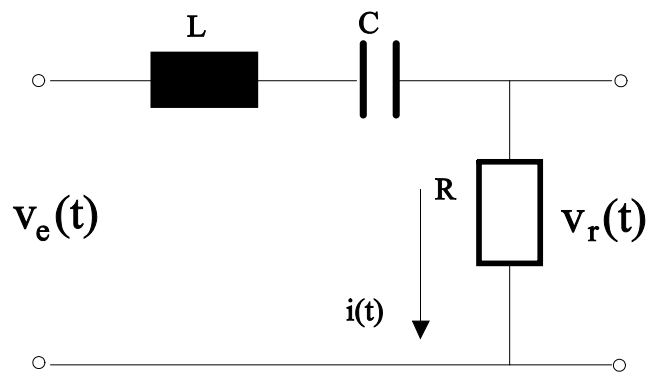

In [43]:
Image(filename='images/rclCircuit.PNG')

Sea el sistema eléctrico de la figura anterior, con las representaciones en variables de estado:

$ \dot{x} = Ax(t)+bu(t)$

$ y=c^T x(t) $

donde las matrices contienen a los coeficientes del circuito,

$ A = \begin{bmatrix} -R/L & -1/L \\ 1/C & 0 \end{bmatrix}
$,
$ b = \begin{bmatrix} 1/L \\ 0 \end{bmatrix}
$,
$ c^T = \begin{bmatrix} R & 0 \end{bmatrix}
$

A continuación, las curvas del circuito RCL para una entrada de $12V$

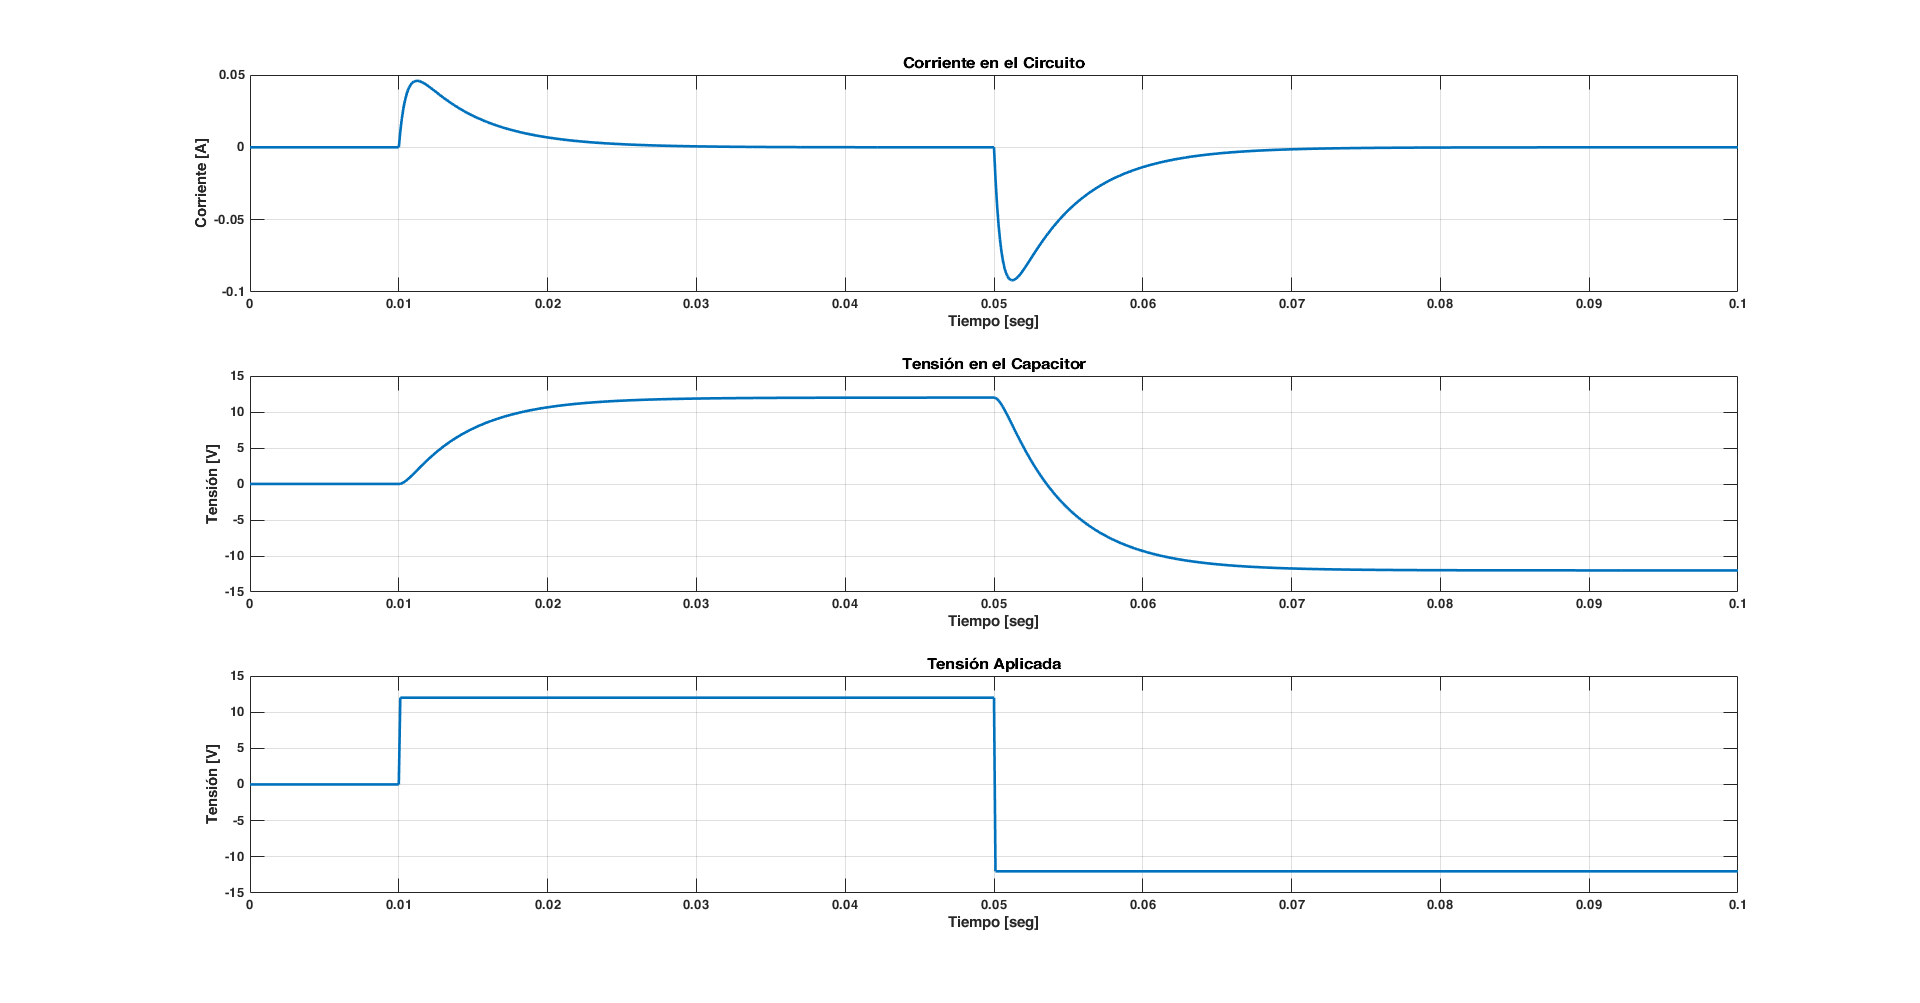

In [44]:
Image(filename='images/corrienteCapacitorTension.png')

En primera instancia, se deben asignar los siguientes valores:

- $ R = 4,7 k\Omega $ 
- $ L = 10 \mu Hy $
- $ C = 100 nF $

Luego de eso, se deben obtener simulaciones que permitan estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V, que cada 1ms cambia de signo. Es decir, se cuenta con la siguiente entrada de tensión.

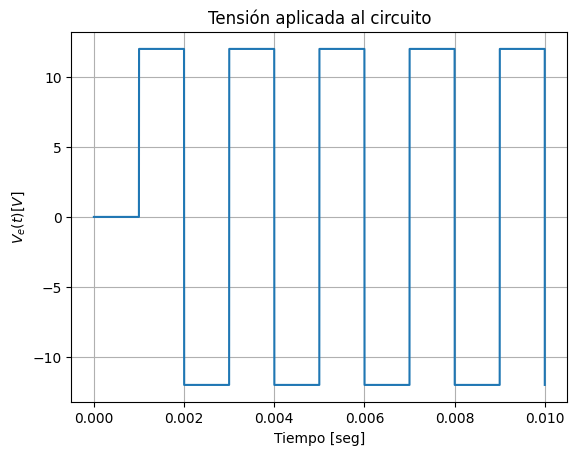

In [45]:
t = np.linspace(0, 0.01, 10000)
u = np.piecewise(t, [t<=0.001, t>0.001], [lambda t: 0*t, lambda t: 12*signal.square(2 * np.pi * 500 * (t - 0.001))])
plt.plot(t,u)
plt.title('Tensión aplicada al circuito')
plt.xlabel('Tiempo [seg]')
plt.ylabel('$V_e(t) [V]$')
plt.grid()

Luego, se simula la respuesta del circuito.

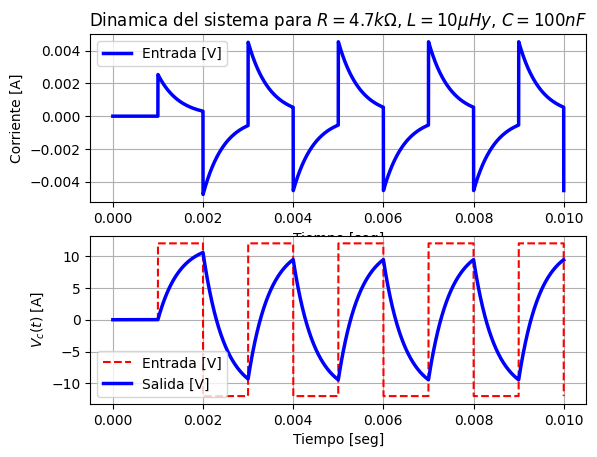

In [46]:
R = 4700
L = 0.00001
C = 0.0000001

A = [[-R/L, -1/L], [1/C, 0]]
B = [[1/L], [0]]  
C1= [1, 0]
C2 = [0, 1]
D = 0

sys1 = signal.StateSpace(A,B,C1,D)
sys2 = signal.StateSpace(A,B,C2,D)

t = np.linspace(0, 0.01, 10000)
u = np.piecewise(t, [t<=0.001, t>0.001], [lambda t: 0*t, lambda t: 12*signal.square(2 * np.pi * 500 * (t - 0.001))])

t1,y1,x1 = signal.lsim(sys1,u,t)
t2,y2,x2 = signal.lsim(sys2,u,t)

plt.subplot(211)
#plt.plot(t, u, 'r--')
plt.plot(t1, y1, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')
plt.title('Dinamica del sistema para $R=4.7k\Omega$, $L=10\mu Hy$, $C=100nF$')
plt.legend(['Entrada [V]', 'Salida [A]'], loc='best')

plt.subplot(212)
plt.plot(t, u, 'r--')
plt.plot(t2, y2, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('$V_c(t)$ [A]')
plt.legend(['Entrada [V]', 'Salida [V]'], loc='best')

Luego, se pide asignar otros valores para los componentes pasivos del circuito RCL:

- $R = 5.6k\Omega$
- $L = 10\mu Hy$
- $C = 100nF$

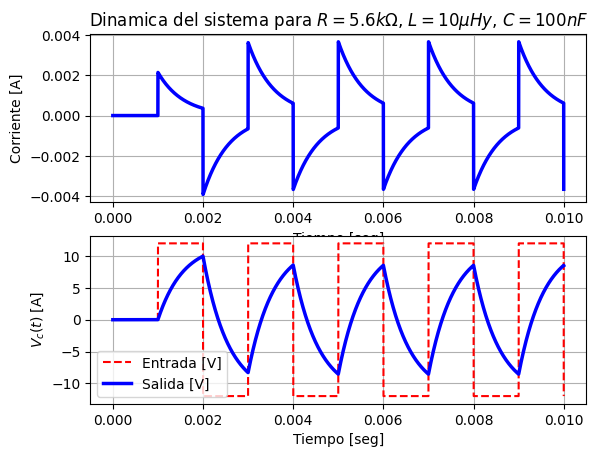

In [47]:
R = 5600
L = 0.00001
C = 0.0000001

A = [[-R/L, -1/L], [1/C, 0]]
B = [[1/L], [0]]  
C1= [1, 0]
C2 = [0, 1]
D = 0

sys1 = signal.StateSpace(A,B,C1,D)
sys2 = signal.StateSpace(A,B,C2,D)

t = np.linspace(0, 0.01, 10000)
u = np.piecewise(t, [t<=0.001, t>0.001], [lambda t: 0*t, lambda t: 12*signal.square(2 * np.pi * 500 * (t - 0.001))])

t1,y1,x1 = signal.lsim(sys1,u,t)
t2,y2,x2 = signal.lsim(sys2,u,t)

plt.subplot(211)
plt.plot(t1, y1, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')
plt.title('Dinamica del sistema para $R=5.6k\Omega$, $L=10\mu Hy$, $C=100nF$')

plt.subplot(212)
plt.plot(t, u, 'r--')
plt.plot(t2, y2, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('$V_c(t)$ [A]')
plt.legend(['Entrada [V]', 'Salida [V]'], loc='best')

Posteriormente, se pide deducir los valores de R, L y C del circuito simulado por el Profesor. Para ello se utilizará el método de la respuesta al escalón, tomando como salida a la tensión medida a bornes del capacitor. Esta información se encuentra disponible en `resources\Curvas_Medidas_RLC.xls`. 

Se grafica la curva de tensión en el capacitor:

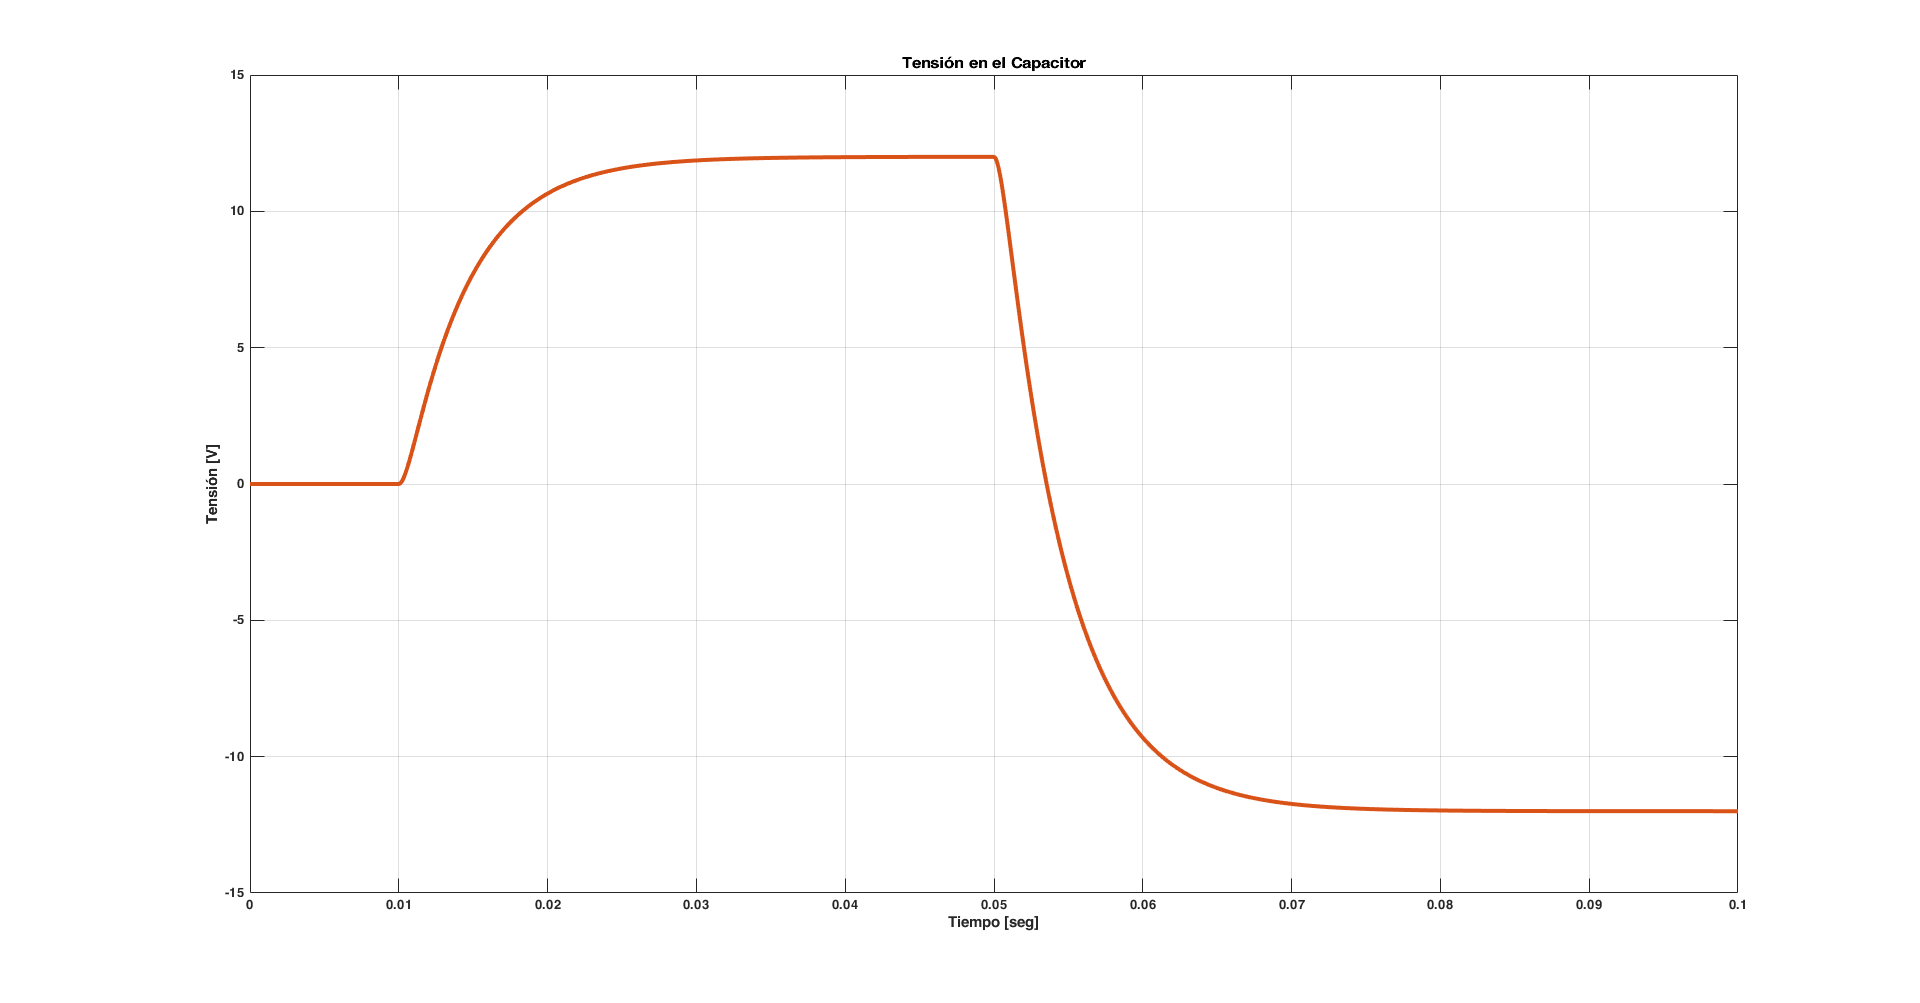

In [48]:
Image(filename='images/tensionCapacitor.png')

Y luego, se muestra la gráfica de la corriente en el circuito.

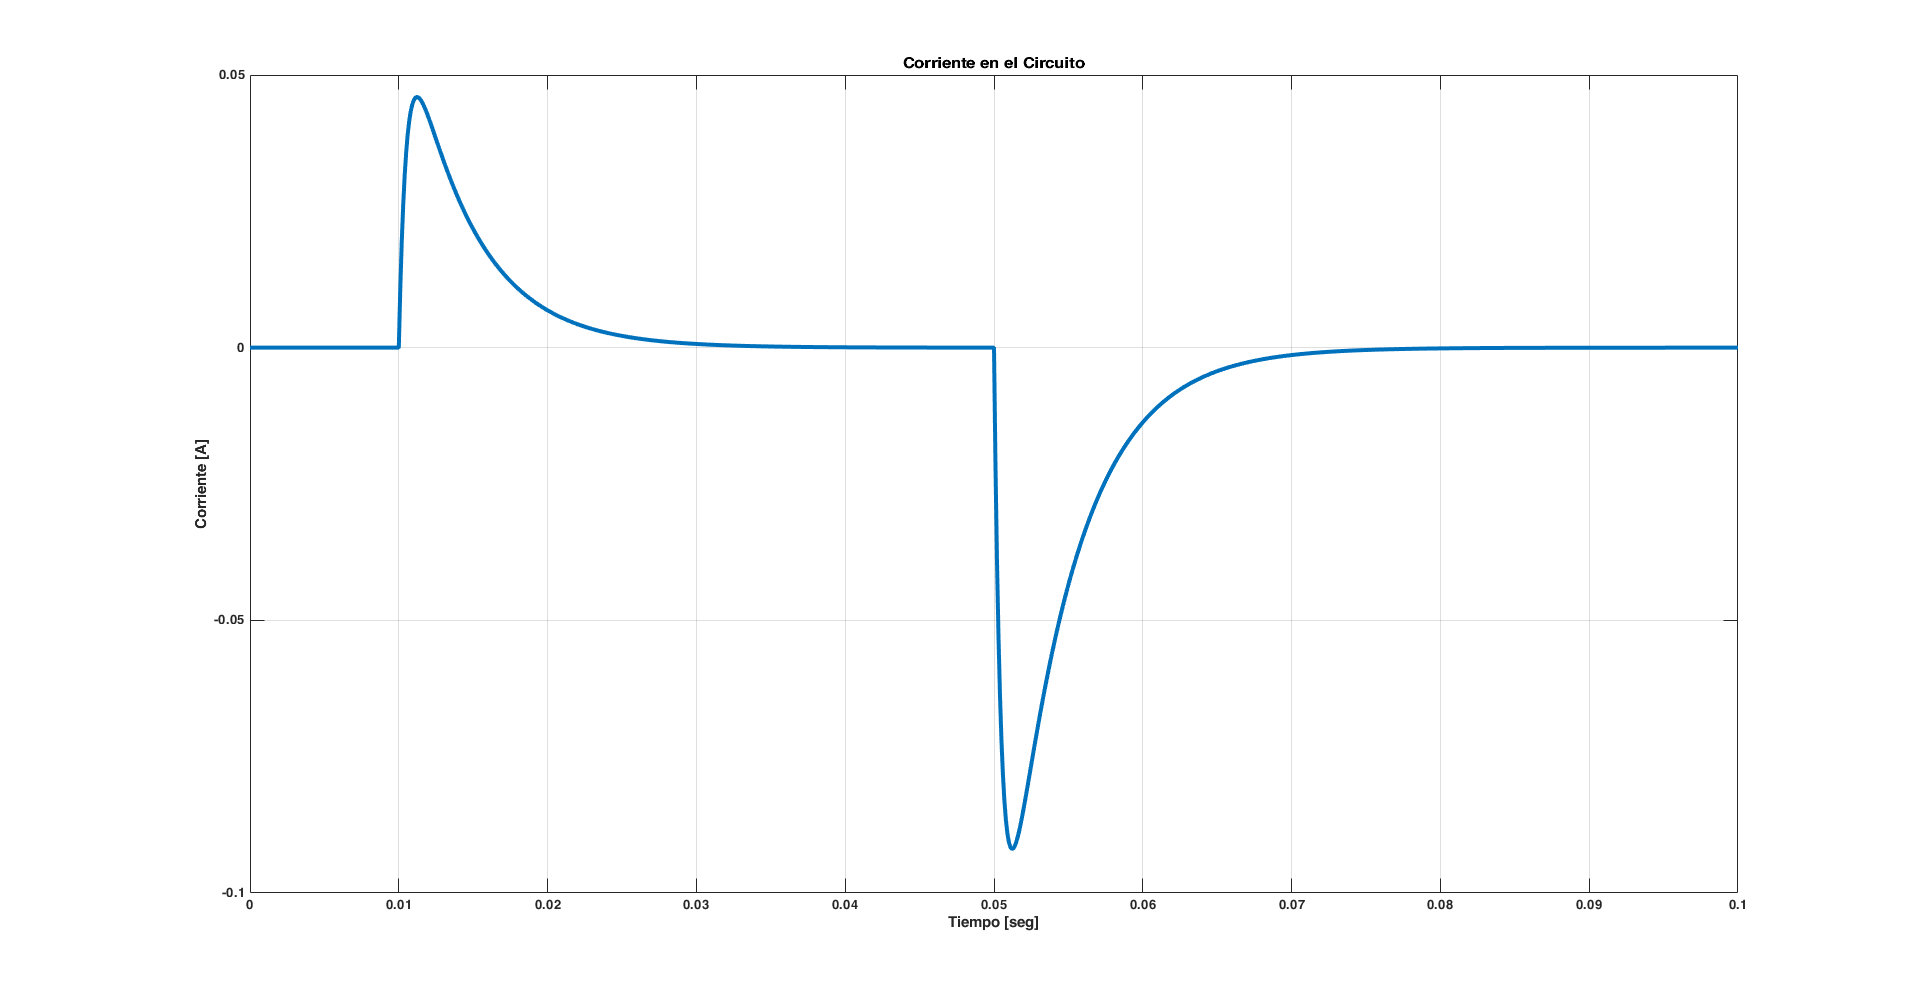

In [49]:
Image(filename='images/corriente.png')

Se tienen las siguientes definiciones para el problema en cuestión:

- $ u(t)=v_e(t) $
- $ y(t)=v_c(t) $

En donde se puede expresar también que $ x(t) = \begin{bmatrix} x_1 & x_2 \end{bmatrix} $ con:

- $ x_1 = i(t) $
- $ x_2 = v_c(t) $ 

Se puede escribir:

- $ \dot{x} = \begin{bmatrix} -R/L & -1/L \\ 1/C & 0 \end{bmatrix} * \begin{bmatrix} i(t) \\ v_c(t) \end{bmatrix} + \begin{bmatrix} 1/L \\ 0 \end{bmatrix} * v_e(t) $
- $ y = \begin{bmatrix} R \\ 0 \end{bmatrix} * \begin{bmatrix} i(t) & v_c(t) \end{bmatrix} $

Las anteriores expresiones brindan información sobre la dinámica del sistema a simular. Es por eso que, teniendo en cuenta que el vector se define como:

$ \dot{x} = \begin{bmatrix} \frac{di(t)}{dt} \\ \frac{dv_c(t)}{dt} \end{bmatrix} $

Se pueden extraer las expresiones correspondientes a la corriente y a la tensión en el capacitor mediante una simple resolución de la suma de matrices, obteniéndose así:

- $ \frac{di(t)}{dt} = \frac{v_e(t) - v_c(t) - Ri(t)}{L} $
- $ \frac{dv_c(t)}{dt} = \frac{i(t)}{C} $



Se aplica la transformada de Laplace a las dos ecuaciones diferenciales anteriores, obteniéndose así:

- $ sI(s) = \frac{1}{L} (V_e(s)-V_c(t)-RI(s)) $
- $ sV_c(s) = \frac{1}{C} I(s) $

Se puede despejar $I(s)$ en cada una de las ecuaciones, para después igualar y obtener la función de transferencia de la tensión en el capacitor. Para ello, nuevamente se utilizará Python, esta vez con el paquete simbólico.

In [50]:
s,I,R,L,C,Ve,Vc = sym.symbols('s I R L C Ve Vc')
eq1 = sym.Eq(s*I,(1/L)*(Ve-Vc-R*I))
eq2 = sym.Eq(s*Vc,(1/C)*I)
I1 = sym.solve(eq1, I)
I2 = sym.solve(eq2, I)

print('Despeje de la corriente en la primera ecuación',I1)
print('Despeje de la corriente en la segunda ecuación',I2)

Despeje de la corriente en la primera ecuación [(-Vc + Ve)/(L*s + R)]
Despeje de la corriente en la segunda ecuación [C*Vc*s]


Se igualan los resultados obtenidos:

In [51]:
eq3 = sym.Eq((-Vc + Ve)/(L*s + R),C*Vc*s)
Vcap = sym.solve(eq3,Vc)
Vcap

[Ve/(C*L*s**2 + C*R*s + 1)]

Con la función de transferencia obtenida en el punto anterior no es cómodo trabajar, por lo que se la simplifica.

In [52]:
print(sym.simplify((Ve/(C*L*s**2 + C*R*s + 1))/Ve))

1/(C*L*s**2 + C*R*s + 1)


Es decir,

$G(s)= \frac{1}{LCs^2+CRs+1}$

Se puede apreciar que la función de transferencia del sistema es de segundo órden, además, por la forma de la respuesta al impulso de la misma, es posible inferir que tiene dos polos reales y distintos. Para reconocer esta función de transferencia, se utiliza el método de Chen. Para ello se plantea un sistema de tres ecuaciones, pero además se deben fijar tres puntos en los que se analizará la respuesta del sistema ante una entrada del tipo escalón de tensión. El método nombrado propone dos formas diferentes de funciones de transferencia para dos tipos distintos de forma de la respuesta ante una entrada escalón unitario. En este caso, se propone la siguiente función de transferencia:

$ G(s) = \frac{K(T_3 s + 1)}{(T_1 s+1)(T_2 s+1)} $

En primera instancia, se muestran las diferentes gráficas analizadas, obtenidas del archivo `resources/Curvas_Medidas_RLC.xls`.

Con ello, se define inicialmente un intervalo de tiempo $t_1$ que será usado como referencia para obtener los valores de la valuación de la función respuesta del sistema en puntos equidistantes, requisito del método de Chen. Para ello, se debe tener en cuenta la respuesta del sistema despreciando el retardo de la tensión de entrada. El intervalor $t_1$ es de $0.01[seg]$. Con ello, se obtienen 3 puntos:

- $y(t_1) = y(0.02) = 10.652017[V] $
- $y(2t_1) = y(0.03) = 11.8663285[V] $
- $y(3t_1) = y(0.04) = 11.9867446[V] $

Con estos datos, y el de la ganancia estática, $K=1$, se obtienen los valores de:

- $ k_1=\frac{y(t_1)}{K}-1 $
- $ k_2=\frac{y(2t_1)}{K}-1 $
- $ k_3=\frac{y(3t_1)}{K}-1 $

In [53]:
yt_1 = 10.652017
y2t_1 = 11.8663285
y3t_1 = 11.9867446
K = 12

k_1 = (yt_1/K) - 1
k_2 = (y2t_1/K) - 1
k_3 = (y3t_1/K) - 1

series = 'k_1', 'k_2', 'k_3'
data = k_1, k_2, k_3
tableData = pd.Series(data, series)
print(tableData)

k_1   -0.112332
k_2   -0.011139
k_3   -0.001105
dtype: float64


Con estos resultados, se puede plantear la obtención de las constantes siguientes:

- $ b = 4k_1^3 k_3 - 3 k_1^2 k_2^2 - 4k_2^3 + k_3^2 + 6k_1 k_2 k_3$
- $ a_1 = \frac{k_1 k_2 + k_3 - \sqrt{b}}{2(k_1^2+k_2)} $
- $ a_2 = \frac{k_1 k_2 + k_3 + \sqrt{b}}{2(k_1^2+k_2)} $
- $ \beta = \frac{2k_1^3 + 3k_1 k_2 + k_3 - \sqrt{b}}{\sqrt{b}} $

In [54]:
b=4*k_1**3*k_3-3*k_1**2*k_2**2-4*k_2**3+k_3**2+6*k_1*k_2*k_3;
alpha_1 = (k_1*k_2+k_3-np.sqrt(b))/(2*(k_1**2 +k_2))
alpha_2 = (k_1*k_2+k_3+np.sqrt(b))/(2*(k_1**2 +k_2))
beta = (2*k_1**3 + 3*k_1*k_2 + k_3 - np.sqrt(b))/(np.sqrt(b))
constantSeries = 'alpha_1', 'alpha_2', 'beta', 'b'
constantData = alpha_1, alpha_2, beta, b
constants = pd.Series(constantData, constantSeries)
print(constants)

alpha_1    7.600648e-07
alpha_2    9.916400e-02
beta      -2.265581e+00
b          2.151475e-08
dtype: float64


Con los valores obtenidos, se estiman las constantes de tiempo del sistema.

- $ \hat{T_1} = - \frac{t_1}{ln(\alpha_1)} $
- $ \hat{T_2} = - \frac{t_1}{ln(\alpha_2)} $
- $ \hat{T_3} = \beta (\hat{T_1} - \hat{T_2})+ \hat{T_1} $

In [55]:
t_1 = 0.01
T_1 = -t_1/np.log(alpha_1)
T_2 = -t_1/np.log(alpha_2)
T_3 = beta*(T_1-T_2)+T_1
seriesT = 'T_1', 'T_2', 'T_3'
dataT = T_1, T_2, T_3
timeConstants = pd.Series(dataT, seriesT)
print(timeConstants)

T_1    0.000710
T_2    0.004327
T_3    0.008905
dtype: float64


Ahora, dado que la función de transferencia del circuito analizado no posee ceros, se desprecia el que aparece por el cálculo de la función de transferencia mediante el método de Chen. Con eso en mente, y desarrollando la expresión, se obtiene lo siguiente:

$ G(s) = \frac{1}{0.00000306s^2 + 0.005037s + 1} $

Y se procede a realizar la simulación del sistema, obteniéndose así la salida de tensión en el capacitor para la señal de entrada dada como una señal cuadrada alternada.

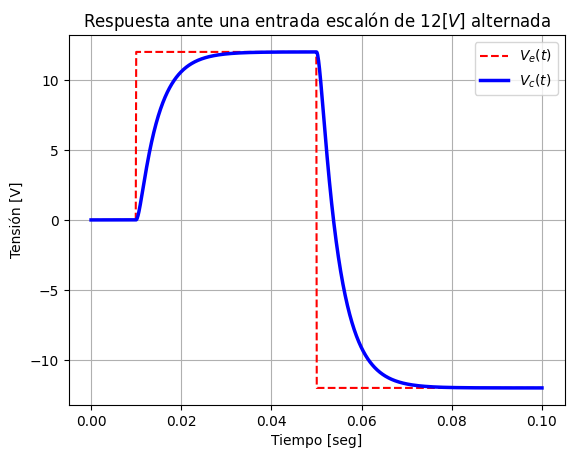

In [56]:
t = np.linspace(0, 0.1, 1000)
u = np.piecewise(t, [(t<=0.01), (t>0.01) & (t<=0.05), (t>0.05)], [lambda t: 0*t, lambda t: 0*t+12, lambda t: 0*t-12])
G = signal.TransferFunction([1],[0.00000306, 0.005037, 1])
t1,y1,x1 = signal.lsim(G,u,t)

plt.plot(t, u, 'r--')
plt.plot(t1, y1, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('Tensión [V]')
plt.title('Respuesta ante una entrada escalón de $12[V]$ alternada')
plt.legend(['$V_e(t)$', '$V_c(t)$'], loc='best')

Se puede apreciar a simple vista una similitud con el gráfico que presenta la consigna de la actividad práctica. Pero para corroborar si realmente la respuesta para la tensión a bordes del capacitor, se creará un DataFrame que almacene los valores de la respuesta, con esta herramienta, es posible comparar los datos de la aproximación realizada mediante el método de Chen y los valores reales de la respuesta del circuito.

In [57]:
df = pd.DataFrame(list(zip(t,y1)),columns=['Tiempo[seg]', 'Tensión en el capacitor [V]'])
df.to_csv('tensionCapacitor.csv',index=False, sep=';', encoding='utf-8')

Ahora, se deben deducir los valores de R, L y C para el circuito en cuestión. Para ello, teniendo en cuenta que se cuenta con el dato de la ecuación característica de la función de transferencia de la tensión en el capacitor, se tienen 3 incógnitas y 2 ecuaciones. Para ello, se supone un valor de la resistencia en el circuito. En este caso, se supondrá $R=220\Omega$, ya que es un valor comercial.

In [58]:
R = 220
LC = 0.00000306
RC = 0.005037

C = RC/R
L = LC/C

componentSeries = 'R[ohm]', 'L[Hy]', 'C[F]'
componentValues = R, L, C
components = pd.Series(componentValues, componentSeries)
print(components)

R[ohm]    220.000000
L[Hy]       0.133651
C[F]        0.000023
dtype: float64


En el siguiente inciso de la consigna se pide emplear la serie de corriente desde $0.05 seg$ en adelante para validar el resultado. Para ello, partiendo del modelo en espacio de estados que es dato del ejercicio, se lo usa para obtener la función de transferencia de la corriente:

Función de transferencia de la corriente:  (array([[0.        , 7.48217372, 0.        ]]), array([1.00000000e+00, 1.64607822e+03, 3.25311901e+05]))
Pico superior de corriente:  0.044569008711275206 [A], pico inferior de corriente:  -0.08913264394398462  [A]
El pico superior se da en t= [0.01151151]  y el pico inferior en  [0.05155155]


Text(0.5, 1.0, 'Dinamica del sistema para $R=220\\Omega$, $L=133.65 mHy$, $C=23\\mu F$')

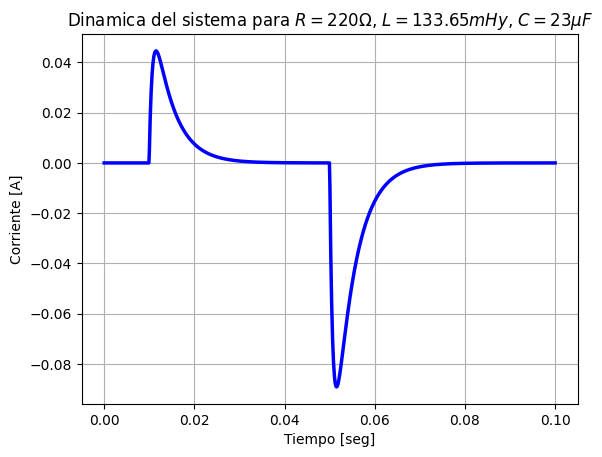

In [59]:
R = 220
L = 0.133651
C = 0.000023

A = [[-R/L, -1/L], [1/C, 0]]
B = [[1/L], [0]]  
C= [1, 0]
D = 0

sys = signal.StateSpace(A,B,C,D)
print('Función de transferencia de la corriente: ', signal.ss2tf(A,B,C,D))

t = np.linspace(0, 0.1, 1000)
u = np.piecewise(t, [(t<=0.01), (t>0.01) & (t<=0.05), (t>0.05)], [lambda t: 0*t, lambda t: 0*t+12, lambda t: 0*t-12])

t1,y1,x1 = signal.lsim(sys,u,t)

print('Pico superior de corriente: ', max(y1), '[A], pico inferior de corriente: ', min(y1), ' [A]')
print('El pico superior se da en t=', t[np.where(y1 == max(y1))], ' y el pico inferior en ', t[np.where(y1 == min(y1))])

plt.plot(t1, y1, 'b-', linewidth=2.5)
plt.grid()
plt.xlabel('Tiempo [seg]')
plt.ylabel('Corriente [A]')
plt.title('Dinamica del sistema para $R=220\Omega$, $L=133.65 mHy$, $C=23\mu F$')

Se puede comprobar que, efectivamente, esos picos son los mismos que se encuentran en la respuesta temporal almacenada en el excel, por lo que los valores supuestos son los correctos.